In [7]:
pip install matplotlib


     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ------- ----------------------------- 30.7/160.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   --- ------------------------------------ 0.7/7.6 MB 23.5 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/7.6 MB 23.9 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.6 MB 18.6 MB/s eta 0:00:01
   ----------------- ---------------------- 3.3/7.6 MB 17.5 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.6 MB 16.5 MB/s eta 0:00:01
   ----------------------- ---------------- 4.5/7.6 MB 16.0 MB/s eta 0:00:01
   -------------------------- ------------- 5.1/7.6 MB 15.5 MB/s eta 0:00:01
   ----------------------------- ---------- 5.6/7.6 MB 15.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.6 MB 15.4 MB/s eta 0:00:01
   -

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("BTCUSDT-1m-2023-11.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'BTCUSDT-1m-2023-11.csv'

In [4]:
print(df.isnull().values.any())
df.head()

False


,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore
0,1698796800000,34651.4,34676.5,34650.0,34669.9,376.040,1698796859999,1.303610e+07,4214,199.885,6.929501e+06,0
1,1698796860000,34669.9,34684.0,34637.3,34637.4,431.177,1698796919999,1.494828e+07,4495,229.490,7.957308e+06,0
2,1698796920000,34637.4,34653.4,34632.5,34651.4,175.894,1698796979999,6.093655e+06,2669,71.494,2.476893e+06,0
3,1698796980000,34651.3,34651.4,34608.6,34621.1,476.587,1698797039999,1.650097e+07,5182,89.613,3.102759e+06,0
4,1698797040000,34621.1,34622.6,34592.0,34615.4,546.312,1698797099999,1.890390e+07,5557,214.962,7.438203e+06,0


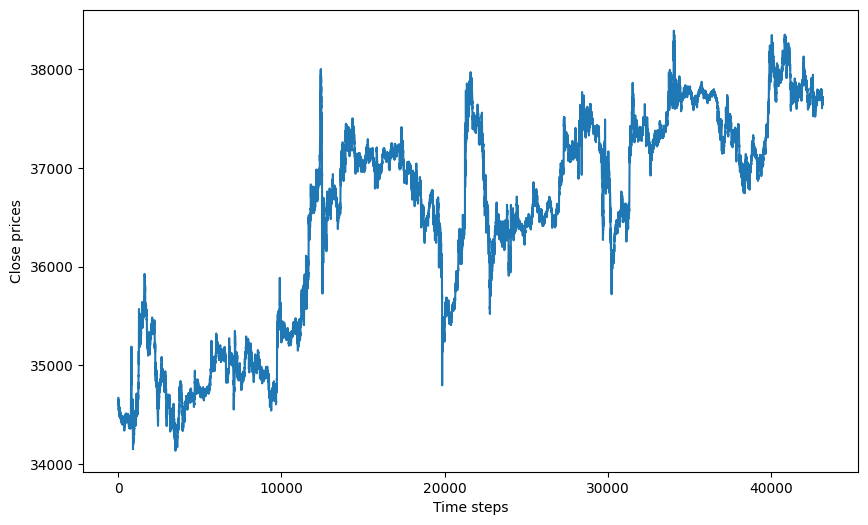

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Close')
plt.xlabel('Time steps')
plt.ylabel('Close prices')
plt.show()

# Indicators







In [6]:
def SMA(close, window):
  sma = []
  for i in range(len(close)):
    if(i >= window-1):
      rolling_avg = close[i-window+1 : i+1].mean()
      sma.append(rolling_avg)
      # dev = close[i-window+1 : i+1].std()
    else:
      sma.append(None)
    # sma.append(df.rolling(window=window).mean())
  ans = pd.Series(sma, index=close.index)
  return ans

In [7]:
def Bol(close, window, num_std_dev):
  sma = []
  std = []
  upper_band = []
  lower_band = []
  for i in range(len(close)):
    if(i >= window-1):
      rolling_mean = close[i-window+1 : i+1].mean()
      sma.append(rolling_mean)
      rolling_std = close[i-window+1 : i+1].std()
      std.append(rolling_std)
      upper = rolling_mean + (num_std_dev * rolling_std)
      lower = rolling_mean - (num_std_dev * rolling_std)
      upper_band.append(upper)
      lower_band.append(lower)
    else:
      sma.append(None)
      std.append(None)
      upper_band.append(None)
      lower_band.append(None)

  return pd.Series(upper_band, index=close.index), pd.Series(lower_band, index=close.index)

In [8]:
def RSI(data, window=14):
  delta = data.diff(1)
  gains = delta.where(delta > 0, 0)
  losses = -delta.where(delta < 0, 0)

  # Calculate average gains and losses over the specified window
  avg_gain = gains.rolling(window=window, min_periods=1).mean()
  avg_loss = losses.rolling(window=window, min_periods=1).mean()

  # Calculate relative strength (RS)
  rs = avg_gain / avg_loss

  # Calculate RSI
  rsi_values = 100 - (100 / (1 + rs))

  return rsi_values

In [9]:
daysma = SMA(df['close'], 1440)
hrsma = SMA(df['close'], 60)

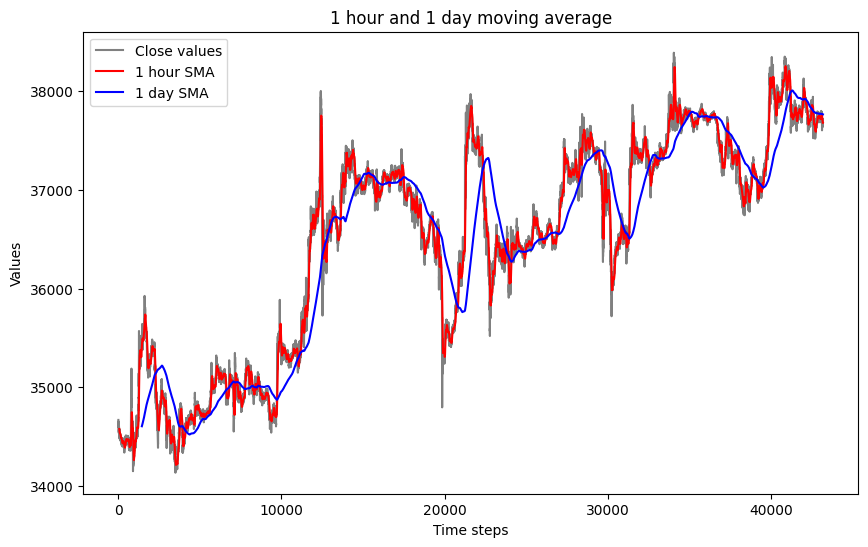

In [10]:
plt.figure(figsize=(10,6))
df['close'].plot(label='Close values', color='grey')
hrsma.plot(label='1 hour SMA', color='red')
daysma.plot(label='1 day SMA', color='blue')

plt.title('1 hour and 1 day moving average')
plt.xlabel('Time steps')
plt.ylabel('Values')
plt.legend()
plt.show()

### Qualitative Understanding
Above is the plot for 1 hour and 1 day moving average just to see the trend in a clear fashion.
It indicates that the market is somewhat volatile and an overall uptrend is seen.


In [11]:
# sma30m = SMA(df['close'], 30)
# sma15m = SMA(df['close'], 15)
df['SMA_15'] = df['close'].rolling(window=15).mean()
df['SMA_30'] = df['close'].rolling(window=30).mean()
df['signal'] = 0
df['trend'] = 0

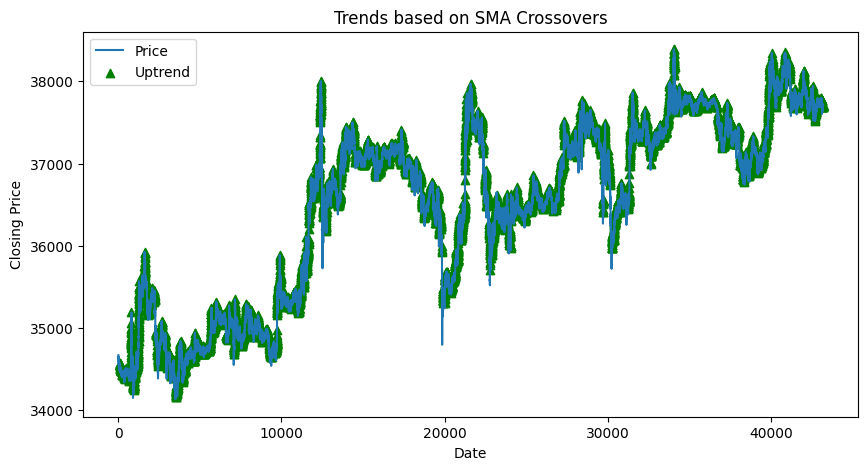

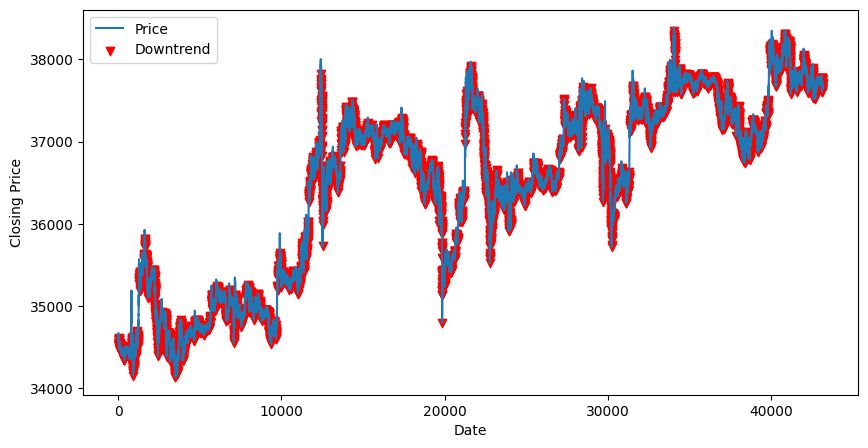

In [12]:
#for analysing trend
#trend values = 1 means uptrend, -1 otherwise

# df.loc[df['SMA_15'] > df['SMA_30'], 'trend'] = 1
# df.loc[df['SMA_15'] < df['SMA_30'], 'trend'] = -1

for i in range(30, len(df)):
  if(df['SMA_15'].iat[i] > df['SMA_30'].iat[i]):
    df['trend'].iat[i] = 1
  else:
    df['trend'].iat[i] = -1

# Plot uptrend with green upward arrows
plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Price')
'''
plt.plot(df['SMA_15'], label='SMA 15 min')
plt.plot(df['SMA_30'], label='SMA 30 min')
'''
plt.scatter(df[df['trend'] == 1].index, df['close'][df['trend'] == 1], marker='^', color='g', label='Uptrend')
plt.title('Trends based on SMA Crossovers')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plot downtrend with green downward arrows
plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Price')
plt.scatter(df[df['trend'] == -1].index, df['close'][df['trend'] == -1], marker='v', color='r', label='Downtrend')
# plt.title('Trends based on SMA Crossovers')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

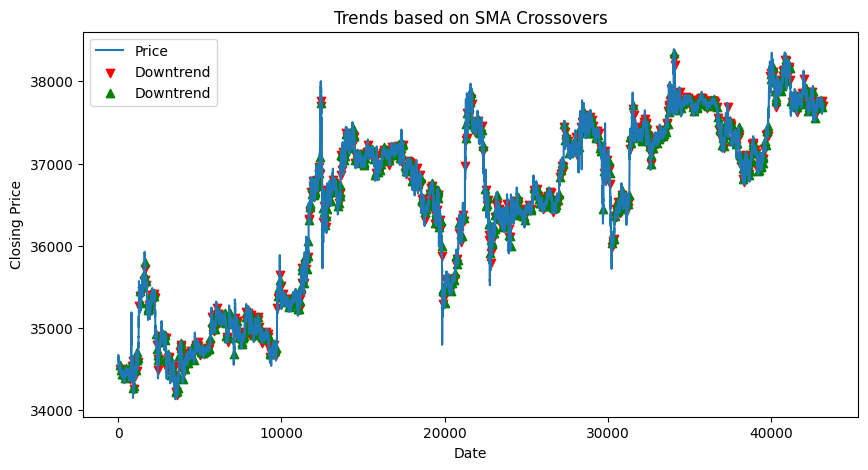

In [13]:
#generating signals
df['signal'] = 0
sum = 0
for i in range(1, len(df)):
  if(df['trend'].iat[i-1] == 0 and df['trend'].iat[i] == 1):
    df['signal'].iat[i] = 1
  elif(df['trend'].iat[i-1] == -1 and df['trend'].iat[i] == 1):
    df['signal'].iat[i] = 1
  elif(df['trend'].iat[i-1] == 1 and df['trend'].iat[i] == -1):
    df['signal'].iat[i] = -1
  sum += df['signal'].iat[i]



plt.figure(figsize=(10, 5))
plt.plot(df['close'], label='Price')
plt.scatter(df[df['signal'] == -1].index, df['close'][df['signal'] == -1], marker='v', color='r', label='Downtrend')
plt.scatter(df[df['signal'] == 1].index, df['close'][df['signal'] == 1], marker='^', color='g', label='Downtrend')
plt.title('Trends based on SMA Crossovers')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Back Testing

In [ ]:
# using SMA crossover strategy
amt = 1000 # initial amount
num = 0
portfolio = []
for i in range(len(df)):

  # if signal is buy, we buy num number of BTC and amt changes to 0
  if(df['signal'].iat[i] == 1):
    num = amt/df['close'].iat[i]
    amt = 0

  # if signal is sell, we sell num number of BTC to get num * current closing price
  elif(df['signal'].iat[i] == -1):
    amt = num * df['close'].iat[i]
    num = 0

  portfolio.append(amt + num * df['close'])
print(amt)

In [ ]:
df['close'].iat[ len(df)-1 ] / df['close'].iat[ 0 ]

1.0878831493601078

In [15]:
portfolio.plot()

AttributeError: 'list' object has no attribute 'plot'

# Rough Work here onwards

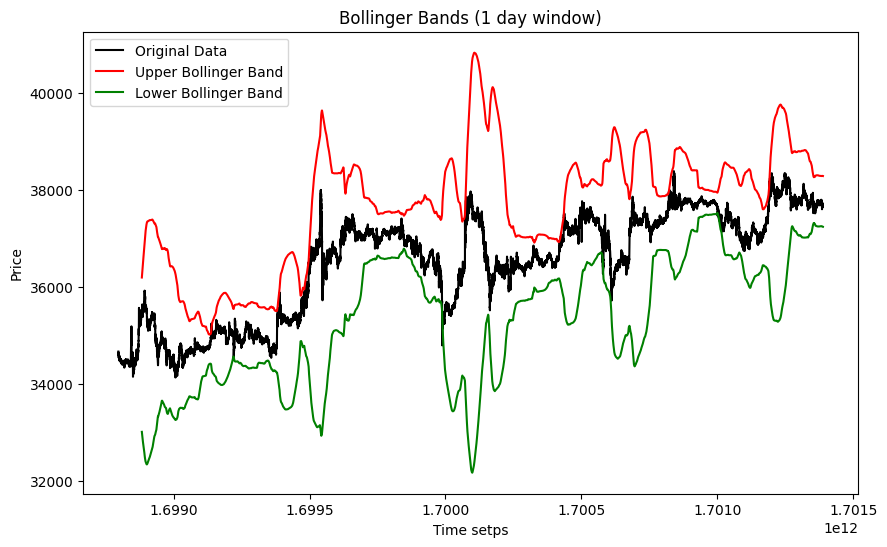

In [ ]:
upper_band, lower_band = Bol(df['close'], 1440, 5)

plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Original Data', color='black')
plt.plot(upper_band, label='Upper Bollinger Band', color='red')
plt.plot(lower_band, label='Lower Bollinger Band', color='green')

plt.title('Bollinger Bands (1 day window)')
plt.xlabel('Time setps')
plt.ylabel('Price')
plt.legend()
plt.show()

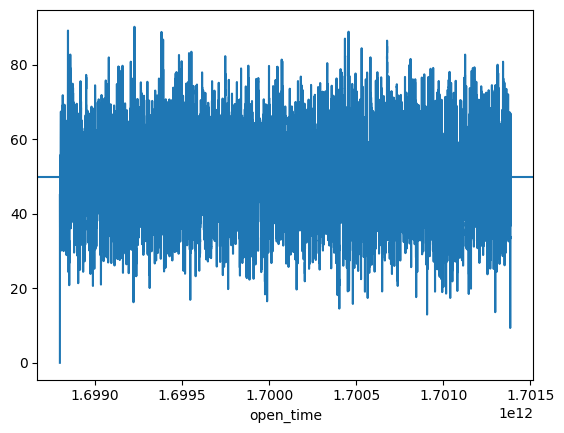

In [ ]:
rsi = RSI(df['close'], 30)
plt = rsi.plot()

In [ ]:
df.to_csv('Fin.csv')

In [ ]:
data = pd.read_csv("BTCUSDT-aggTrades-2023-11.csv")
print(data.shape)
data.head()

(2701628, 7)


<ipython-input-108-ccdee7fe142e>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("BTCUSDT-aggTrades-2023-11.csv")


,agg_trade_id,price,quantity,first_trade_id,last_trade_id,transact_time,is_buyer_maker
0,1900987669,34651.4,0.258,4.244484e+09,4.244484e+09,1.698797e+12,False
1,1900987670,34651.3,0.001,4.244484e+09,4.244484e+09,1.698797e+12,True
2,1900987671,34651.4,0.007,4.244484e+09,4.244484e+09,1.698797e+12,False
3,1900987672,34651.3,0.361,4.244484e+09,4.244484e+09,1.698797e+12,True
4,1900987673,34651.4,0.007,4.244484e+09,4.244484e+09,1.698797e+12,False
